In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "MIG-166d7783-762d-5f61-b31c-549eb4e0fba0"

In [2]:
import sys
sys.path.append('../2_train_models')

import os
import numpy as np
import matplotlib.pyplot as plt

from data_loading import extract_peaks

In [3]:
cell_type, model_type = "K562", "strand_merged_umap"
cage_or_rampage = "rampage"

In [4]:
# load filepaths and other info from configs

from file_configs import MergedFilesConfig

configs = dict()
configs["procap"] = MergedFilesConfig(cell_type, model_type, data_type = "procap")
configs[cage_or_rampage] = MergedFilesConfig(cell_type, model_type, data_type = cage_or_rampage)

assert configs["procap"].genome_path == configs[cage_or_rampage].genome_path
assert configs["procap"].chrom_sizes == configs[cage_or_rampage].chrom_sizes
assert configs["procap"].stranded_model == configs[cage_or_rampage].stranded_model

in_window = 2114
out_window = 1000

genome_path = configs["procap"].genome_path
chrom_sizes = configs["procap"].chrom_sizes
stranded = configs["procap"].stranded_model

all_peak_paths = {expt : configs[expt].all_peak_path for expt in configs.keys()}

plus_bw_paths = {expt : configs[expt].plus_bw_path for expt in configs.keys()}
minus_bw_paths = {expt : configs[expt].minus_bw_path for expt in configs.keys()}

phylop_bw_path = configs["procap"].proj_dir + "annotations/hg38.phyloP100way.bw"

figures_dir = configs["procap"].proj_dir + "figures/"

In [5]:
# since we need to generate new predictions

from file_configs import FoldFilesConfig

cage_timestamps = ["2023-09-13_21-57-36", "2023-09-13_23-37-50", "2023-09-14_01-07-10",
                   "2023-09-14_02-28-40", "2023-09-14_03-25-49", "2023-09-14_04-44-39",
                   "2023-09-14_05-56-16"]

# using the fold5 model since MALAT1 (example below) was in test chroms
#procap_timestamp = "2023-05-29_15-51-40"
#procap_timestamp = "2023-05-29_23-21-23"
procap_timestamps = ["2023-05-29_15-51-40", "2023-05-29_15-58-41", "2023-05-29_15-59-09",
                     "2023-05-30_01-40-06", "2023-05-29_23-21-23", "2023-05-29_23-23-45",
                     "2023-05-29_23-24-11"]

# "1" below actually doesn't do anything; folds are known by timestamp after training
fold_configs_cage = [FoldFilesConfig(cell_type, model_type, "1", timestamp, data_type=cage_or_rampage) for timestamp in cage_timestamps]
fold_configs_procap = [FoldFilesConfig(cell_type, model_type, "1", timestamp, data_type="procap") for timestamp in procap_timestamps]


Timestamp: 2023-09-13_21-57-36
Timestamp: 2023-09-13_23-37-50
Timestamp: 2023-09-14_01-07-10
Timestamp: 2023-09-14_02-28-40
Timestamp: 2023-09-14_03-25-49
Timestamp: 2023-09-14_04-44-39
Timestamp: 2023-09-14_05-56-16
Timestamp: 2023-05-29_15-51-40
Timestamp: 2023-05-29_15-58-41
Timestamp: 2023-05-29_15-59-09
Timestamp: 2023-05-30_01-40-06
Timestamp: 2023-05-29_23-21-23
Timestamp: 2023-05-29_23-23-45
Timestamp: 2023-05-29_23-24-11


In [6]:
# load observed read counts

onehot_seqs, true_profs_procap = extract_peaks(genome_path, chrom_sizes,
                                  plus_bw_paths["procap"], minus_bw_paths["procap"],
                                  all_peak_paths["procap"],
                                  in_window=in_window,
                                  out_window=out_window,
                                  max_jitter=0, verbose=True)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:10<00:00,  2.23it/s]
Loading Peaks: 30534it [00:44, 688.99it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 30534
Mask loaded? False


In [7]:
_, true_profs_cage = extract_peaks(genome_path, chrom_sizes,
                                  plus_bw_paths[cage_or_rampage], minus_bw_paths[cage_or_rampage],
                                  all_peak_paths["procap"],
                                  in_window=in_window,
                                  out_window=out_window,
                                  max_jitter=0, verbose=True)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.03it/s]
Loading Peaks: 30534it [00:40, 746.68it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 30534
Mask loaded? False


In [8]:
onehot_seqs_cagepeaks, true_profs_cage_cagepeaks = extract_peaks(genome_path, chrom_sizes,
                                  plus_bw_paths[cage_or_rampage], minus_bw_paths[cage_or_rampage],
                                  all_peak_paths[cage_or_rampage],
                                  in_window=in_window,
                                  out_window=out_window,
                                  max_jitter=0, verbose=True)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.00it/s]
Loading Peaks: 14685it [00:19, 743.76it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 14685
Mask loaded? False


In [9]:
true_counts_procap = true_profs_procap.sum(axis=(-1,-2))
true_counts_cage = true_profs_cage.sum(axis=(-1,-2))
true_counts_cage_cagepeaks = true_profs_cage_cagepeaks.sum(axis=(-1,-2))

In [10]:
pred_logcounts_procap = np.load(configs["procap"].pred_logcounts_all_path).squeeze()
pred_counts_procap = np.exp(pred_logcounts_procap)

In [11]:
import torch
sys.path.append("../3_eval_models")
from eval_utils import model_predict_with_rc


def load_model(model_path):
    model = torch.load(model_path)
    model.eval()
    model = model.cuda()
    return model

def generate_pred_logcounts(onehot_seqs, model):
    _, pred_logcounts = model_predict_with_rc(model, onehot_seqs)
    return pred_logcounts.squeeze()

def generate_pred_logcounts_all_folds(onehot_seqs, fold_configs):
    pred_logcounts_all_folds = []
    for fold_config in fold_configs:
        print(fold_config.timestamp)
        model = load_model(fold_config.model_save_path)
        
        pred_logcounts = generate_pred_logcounts(onehot_seqs, model)
        pred_logcounts_all_folds.append(pred_logcounts)
        
    return np.array(pred_logcounts_all_folds).mean(axis=0)

pred_logcounts_cage = generate_pred_logcounts_all_folds(onehot_seqs, fold_configs_cage)

2023-09-13_21-57-36
2023-09-13_23-37-50
2023-09-14_01-07-10
2023-09-14_02-28-40
2023-09-14_03-25-49
2023-09-14_04-44-39
2023-09-14_05-56-16


In [13]:
from common_functions import load_coords
from collections import defaultdict
from data_loading import extract_observed_profiles


def get_pseudorep_filepaths(pseudorep, pos_or_neg, data_dir):
    # Get paths to bigwigs for the pseudoreplicates of an experiment
    #  - pseudorep should be either an int (1-indexed) or an integer string
    
    assert pos_or_neg in ["pos", "neg"], pos_or_neg
    return os.path.join(data_dir, "pseudorep" + str(pseudorep) + "." + pos_or_neg + ".bigWig")

def get_sort_order_test_sets(cell_type, model_type, data_type, timestamps):
    # the way I loaded in the test sets fold-by-fold,
    # the examples are not in the same order as the all_peaks_bed file order
    # so this function figures out how to reorder the test set data
    
    test_coords = []
    
    for fold_0_index, timestamp in enumerate(timestamps):
        fold = str(fold_0_index + 1)
        config = FoldFilesConfig(cell_type, model_type, fold, timestamp, data_type)
        
        test_coords.extend(load_coords(config.test_peak_path, in_window))
        
    # this contains the same coords at test_coords, but in the correct order this time
    merged_config = MergedFilesConfig(cell_type, model_type, data_type)
    all_coords = load_coords(merged_config.all_peak_path, in_window)
    
    sort_order = [test_coords.index(coord) for coord in all_coords]
    assert np.all(np.array(all_coords) == np.array(test_coords)[sort_order])
    
    return sort_order


def load_test_data(cell_type, model_type, data_types_to_timestamps):
    pr1_profs = defaultdict(lambda : [])
    pr2_profs = defaultdict(lambda : [])
    log_pred_profs = defaultdict(lambda : [])
    pred_logcounts = defaultdict(lambda : [])
    
    for data_type, timestamps in data_types_to_timestamps.items():
        for fold_0_index, timestamp in enumerate(timestamps):
            fold = str(fold_0_index + 1)  # doesn't matter bc we use timestamp
            config = FoldFilesConfig(cell_type, model_type, fold, timestamp, data_type)

            pr1 = extract_observed_profiles(get_pseudorep_filepaths(1, "pos", config.data_dir),
                                           get_pseudorep_filepaths(1, "neg", config.data_dir),
                                           config.test_peak_path,
                                           out_window=out_window,
                                           verbose=True)
            pr1_profs[data_type].extend(pr1)

            pr2 = extract_observed_profiles(get_pseudorep_filepaths(2, "pos", config.data_dir),
                                           get_pseudorep_filepaths(2, "neg", config.data_dir),
                                           config.test_peak_path,
                                           out_window=out_window,
                                           verbose=True)
            pr2_profs[data_type].extend(pr2)
            
            log_pred_profs[data_type].extend(np.load(config.pred_profiles_test_path))
            pred_logcounts[data_type].extend(np.load(config.pred_logcounts_test_path))

        pr1_profs[data_type] = np.array(pr1_profs[data_type])
        pr2_profs[data_type] = np.array(pr2_profs[data_type])
        log_pred_profs[data_type] = np.array(log_pred_profs[data_type])
        pred_logcounts[data_type] = np.array(pred_logcounts[data_type])

        sort_order = get_sort_order_test_sets(cell_type, model_type, data_type, timestamps)

        pr1_profs[data_type] = pr1_profs[data_type][sort_order]
        pr2_profs[data_type] = pr2_profs[data_type][sort_order]
        log_pred_profs[data_type] = log_pred_profs[data_type][sort_order]
        pred_logcounts[data_type] = pred_logcounts[data_type][sort_order]
    
    return pr1_profs, pr2_profs, log_pred_profs, pred_logcounts


pr1_profs, pr2_profs, log_pred_profs_test, pred_logcounts_test = load_test_data(cell_type, model_type,
                                      {"procap" : procap_timestamps,
                                       cage_or_rampage : cage_timestamps})

Timestamp: 2023-05-29_15-51-40


Loading Profiles: 4334it [00:01, 4062.87it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold1_test.bed.gz
Profile length: 1000
Num. Examples: 4334



Loading Profiles: 4334it [00:01, 4158.21it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold1_test.bed.gz
Profile length: 1000
Num. Examples: 4334


Timestamp: 2023-05-29_15-58-41


Loading Profiles: 3699it [00:00, 4056.27it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold2_test.bed.gz
Profile length: 1000
Num. Examples: 3699



Loading Profiles: 3699it [00:00, 4069.53it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold2_test.bed.gz
Profile length: 1000
Num. Examples: 3699


Timestamp: 2023-05-29_15-59-09


Loading Profiles: 4559it [00:01, 3950.61it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold3_test.bed.gz
Profile length: 1000
Num. Examples: 4559



Loading Profiles: 4559it [00:01, 4068.09it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold3_test.bed.gz
Profile length: 1000
Num. Examples: 4559


Timestamp: 2023-05-30_01-40-06


Loading Profiles: 3887it [00:00, 4023.50it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold4_test.bed.gz
Profile length: 1000
Num. Examples: 3887



Loading Profiles: 3887it [00:00, 4114.72it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold4_test.bed.gz
Profile length: 1000
Num. Examples: 3887


Timestamp: 2023-05-29_23-21-23


Loading Profiles: 4470it [00:01, 4083.42it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold5_test.bed.gz
Profile length: 1000
Num. Examples: 4470



Loading Profiles: 4470it [00:00, 4661.79it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold5_test.bed.gz
Profile length: 1000
Num. Examples: 4470


Timestamp: 2023-05-29_23-23-45


Loading Profiles: 5238it [00:01, 4695.84it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold6_test.bed.gz
Profile length: 1000
Num. Examples: 5238



Loading Profiles: 5238it [00:01, 4792.00it/s]


== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold6_test.bed.gz
Profile length: 1000
Num. Examples: 5238
Timestamp: 2023-05-29_23-24-11


Loading Profiles: 4347it [00:00, 4802.22it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold7_test.bed.gz
Profile length: 1000
Num. Examples: 4347



Loading Profiles: 4347it [00:00, 4672.95it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold7_test.bed.gz
Profile length: 1000
Num. Examples: 4347


Timestamp: 2023-05-29_15-51-40
Timestamp: 2023-05-29_15-58-41
Timestamp: 2023-05-29_15-59-09
Timestamp: 2023-05-30_01-40-06
Timestamp: 2023-05-29_23-21-23
Timestamp: 2023-05-29_23-23-45
Timestamp: 2023-05-29_23-24-11
Timestamp: 2023-09-13_21-57-36


Loading Profiles: 2077it [00:00, 3327.97it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold1_test.bed.gz
Profile length: 1000
Num. Examples: 2077



Loading Profiles: 2077it [00:00, 3418.50it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold1_test.bed.gz
Profile length: 1000
Num. Examples: 2077


Timestamp: 2023-09-13_23-37-50


Loading Profiles: 1881it [00:00, 3860.53it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold2_test.bed.gz
Profile length: 1000
Num. Examples: 1881



Loading Profiles: 1881it [00:00, 3999.49it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold2_test.bed.gz
Profile length: 1000
Num. Examples: 1881


Timestamp: 2023-09-14_01-07-10


Loading Profiles: 2091it [00:00, 4349.01it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold3_test.bed.gz
Profile length: 1000
Num. Examples: 2091



Loading Profiles: 2091it [00:00, 4605.05it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold3_test.bed.gz
Profile length: 1000
Num. Examples: 2091


Timestamp: 2023-09-14_02-28-40


Loading Profiles: 1732it [00:00, 4044.19it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold4_test.bed.gz
Profile length: 1000
Num. Examples: 1732



Loading Profiles: 1732it [00:00, 4290.38it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold4_test.bed.gz
Profile length: 1000
Num. Examples: 1732


Timestamp: 2023-09-14_03-25-49


Loading Profiles: 2155it [00:00, 3807.32it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold5_test.bed.gz
Profile length: 1000
Num. Examples: 2155



Loading Profiles: 2155it [00:00, 3974.72it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold5_test.bed.gz
Profile length: 1000
Num. Examples: 2155


Timestamp: 2023-09-14_04-44-39


Loading Profiles: 2520it [00:00, 3792.57it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold6_test.bed.gz
Profile length: 1000
Num. Examples: 2520



Loading Profiles: 2520it [00:00, 3978.85it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold6_test.bed.gz
Profile length: 1000
Num. Examples: 2520


Timestamp: 2023-09-14_05-56-16


Loading Profiles: 2229it [00:00, 3731.24it/s]


== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold7_test.bed.gz
Profile length: 1000
Num. Examples: 2229


Loading Profiles: 2229it [00:00, 3971.17it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold7_test.bed.gz
Profile length: 1000
Num. Examples: 2229


Timestamp: 2023-09-13_21-57-36
Timestamp: 2023-09-13_23-37-50
Timestamp: 2023-09-14_01-07-10
Timestamp: 2023-09-14_02-28-40
Timestamp: 2023-09-14_03-25-49
Timestamp: 2023-09-14_04-44-39
Timestamp: 2023-09-14_05-56-16


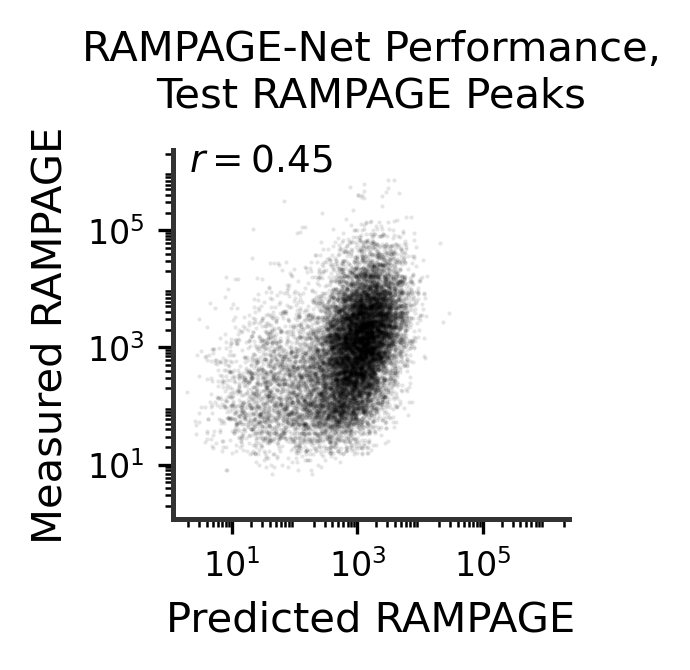

In [41]:
from matplotlib import ticker as mticker

def plot_pred_vs_true_cage_counts(pred_counts, true_counts,
                             title = None, save_path = None):

    pred_counts = pred_counts.squeeze().flatten()
    true_counts = true_counts.squeeze().flatten()
    
    assert pred_counts.shape == true_counts.shape, (pred_counts.shape, true_counts.shape)
    
    pearson_r = np.corrcoef(np.log1p(pred_counts),
                            np.log1p(true_counts))[0,1]

    plt.figure(figsize=(1.7,1.6), dpi=300)

    plt.scatter(pred_counts, true_counts,
                alpha = 0.1, s = 1, color="k", linewidths=0)

    plt.semilogy()
    plt.semilogx()

    max_lim = max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1])
    min_lim = min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0])
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)
    plt.xticks([10, 1000, 100000])
    plt.yticks([10, 1000, 100000])

    plt.xlabel("Predicted " + cage_or_rampage.upper(), fontsize=10)
    plt.ylabel("Measured " + cage_or_rampage.upper(), fontsize=10)

    if pearson_r is not None:
        plt.text(min_lim * 1.8, max_lim * 0.45,
                 r'$r = %0.2f$' % pearson_r,
                 fontsize=9)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params("both", labelsize=8)
    ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    if title is not None:
        plt.title(title, fontsize=10, y=1.05)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()


title = cage_or_rampage.upper() + "-Net Performance,\nTest " + cage_or_rampage.upper() + " Peaks"
    
plot_pred_vs_true_cage_counts(np.exp(pred_logcounts_test[cage_or_rampage]),
                              true_counts_cage_cagepeaks,
                              title = title,
                              save_path = figures_dir + "7_" + cage_or_rampage + "_obs_vs_preds.png")

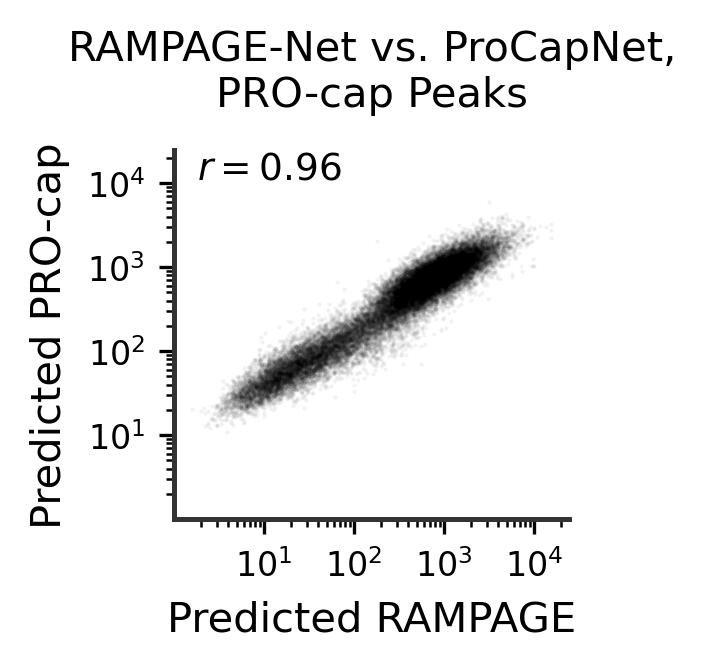

In [40]:
def plot_pred_vs_pred_counts(pred_counts, true_counts,
                             title = None, save_path = None):

    pred_counts = pred_counts.squeeze().flatten()
    true_counts = true_counts.squeeze().flatten()
    
    assert pred_counts.shape == true_counts.shape, (pred_counts.shape, true_counts.shape)
    
    pearson_r = np.corrcoef(np.log1p(pred_counts),
                            np.log1p(true_counts))[0,1]

    plt.figure(figsize=(1.7,1.6), dpi=300)

    plt.scatter(pred_counts, true_counts,
                alpha = 0.05, s = 1, color="k", linewidths=0)

    plt.semilogy()
    plt.semilogx()

    max_lim = max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1])
    min_lim = min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0])
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.xlabel("Predicted " + cage_or_rampage.upper(), fontsize=10)
    plt.ylabel("Predicted PRO-cap", fontsize=10)

    if pearson_r is not None:
        plt.text(min_lim * 1.8, max_lim * 0.45,
                 r'$r = %0.2f$' % pearson_r,
                 fontsize=9)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params("both", labelsize=8)
    
    plt.xticks([10, 100, 1000, 10000])
    plt.yticks([10, 100, 1000, 10000])
    ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    if title is not None:
        plt.title(title, fontsize=10, y=1.05)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()

    
title = cage_or_rampage.upper() + "-Net vs. ProCapNet,\nPRO-cap Peaks"

plot_pred_vs_pred_counts(np.exp(pred_logcounts_cage), np.exp(pred_logcounts_procap),
                         title = title,
                         save_path = figures_dir + "7_" + cage_or_rampage + "_vs_procap_preds.png")

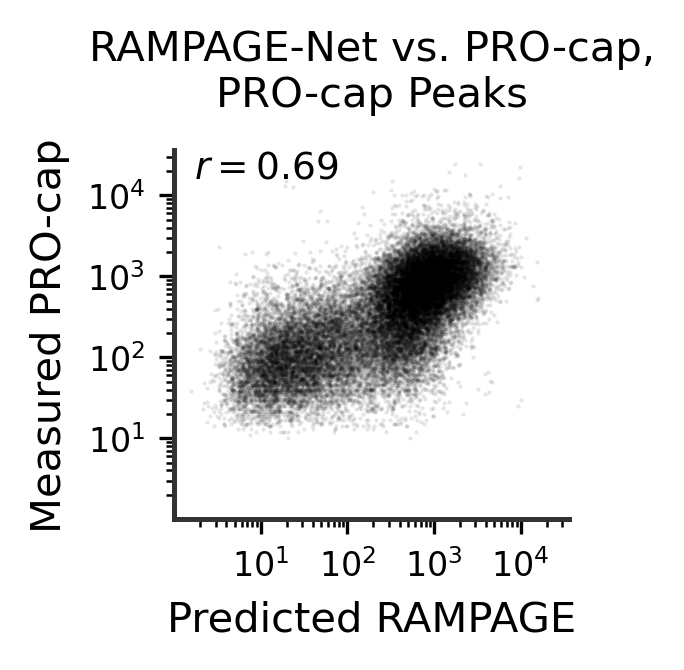

In [38]:
def plot_pred_cage_vs_true_procap(pred_counts, true_counts,
                             title = None, save_path = None):

    pred_counts = pred_counts.squeeze().flatten()
    true_counts = true_counts.squeeze().flatten()
    
    assert pred_counts.shape == true_counts.shape, (pred_counts.shape, true_counts.shape)
    
    pearson_r = np.corrcoef(np.log1p(pred_counts),
                            np.log1p(true_counts))[0,1]

    plt.figure(figsize=(1.7,1.6), dpi=300)

    plt.scatter(pred_counts, true_counts,
                alpha = 0.1, s = 1, color="k", linewidths=0)

    plt.semilogy()
    plt.semilogx()

    max_lim = max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1])
    min_lim = min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0])
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.xlabel("Predicted " + cage_or_rampage.upper(), fontsize=10)
    plt.ylabel("Measured PRO-cap", fontsize=10)

    if pearson_r is not None:
        plt.text(min_lim * 1.7, max_lim * 0.45,
                 r'$r = %0.2f$' % pearson_r,
                 fontsize=9)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params("both", labelsize=8) 
    
    plt.xticks([10, 100, 1000, 10000])
    plt.yticks([10, 100, 1000, 10000])
    ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    if title is not None:
        plt.title(title, fontsize=10, y=1.05)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()


plot_pred_cage_vs_true_procap(np.exp(pred_logcounts_cage), true_counts_procap,
                              title = cage_or_rampage.upper() + "-Net vs. PRO-cap,\nPRO-cap Peaks",
                              save_path = figures_dir + "7_" + cage_or_rampage + "_preds_vs_obs_procap.png")

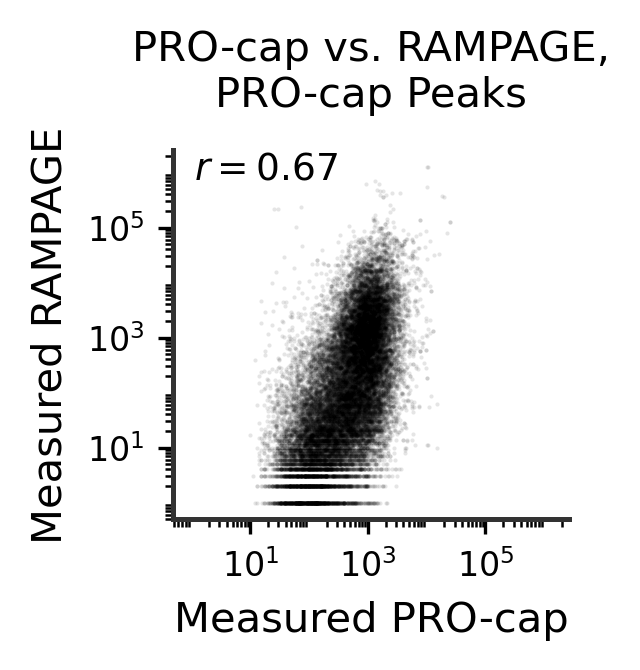

In [73]:
def plot_true_cage_vs_true_procap(pred_counts, true_counts,
                             title = None, save_path = None):

    pred_counts = pred_counts.squeeze().flatten()
    true_counts = true_counts.squeeze().flatten()
    
    assert pred_counts.shape == true_counts.shape, (pred_counts.shape, true_counts.shape)
    
    pearson_r = np.corrcoef(np.log1p(pred_counts),
                            np.log1p(true_counts))[0,1]

    plt.figure(figsize=(1.7,1.6), dpi=300)

    plt.scatter(pred_counts, true_counts,
                alpha = 0.1, s = 1, color="k", linewidths=0)

    plt.semilogy()
    plt.semilogx()

    max_lim = max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1])
    min_lim = min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0])
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.xlabel("Measured PRO-cap", fontsize=10)
    plt.ylabel("Measured " + cage_or_rampage.upper(), fontsize=10)

    if pearson_r is not None:
        plt.text(min_lim * 2.2, max_lim * 0.3,
                 r'$r = %0.2f$' % pearson_r,
                 fontsize=9)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params("both", labelsize=8) 
    
    plt.xticks([10, 1000, 100000])
    plt.yticks([10, 1000, 100000])
    ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    if title is not None:
        plt.title(title, fontsize=10, y=1.05)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()


plot_true_cage_vs_true_procap(true_counts_procap, true_counts_cage,
                         title = "PRO-cap vs. " + cage_or_rampage.upper() + ",\nPRO-cap Peaks",
                              save_path = figures_dir + "7_" + cage_or_rampage + "_vs_procap_obs.png")

## Fig. 7E: Example Locus

In [43]:
import pyBigWig
from data_loading import read_fasta_fast, one_hot_encode


def load_sequence_at_locus(chrom, start, end, genome_path):
    genome = read_fasta_fast(genome_path, include_chroms = [chrom])
    seq = genome[chrom][start:end]
    onehot_seq = one_hot_encode(seq).T
    return seq, onehot_seq


def load_observed_profile_at_locus(chrom, start, end, plus_bw_path, minus_bw_path):
    with pyBigWig.open(plus_bw_path, "r") as plus_bw:
        plus_sig = plus_bw.values(chrom, start, end, numpy=True)
    plus_sig = np.nan_to_num(plus_sig)

    with pyBigWig.open(minus_bw_path, "r") as minus_bw:
        minus_sig = minus_bw.values(chrom, start, end, numpy=True)
    minus_sig = np.nan_to_num(minus_sig)

    signal = np.array([plus_sig, minus_sig])
    return signal


def get_locus_data(chrom, start, end, configs):
    mid = (start + end) // 2
    seq_start = mid - in_window // 2
    seq_end = seq_start + in_window
    seq, onehot_seq = load_sequence_at_locus(chrom, seq_start, seq_end, genome_path)
    
    prof_start = mid - out_window // 2
    prof_end = prof_start + out_window
    
    profs = dict()
    for expt in configs.keys():
        profs[expt] = load_observed_profile_at_locus(chrom, prof_start, prof_end,
                                                     plus_bw_paths[expt], minus_bw_paths[expt])
    
    phylop_scores = load_observed_profile_at_locus(chrom, prof_start, prof_end,
                                                  phylop_bw_path, phylop_bw_path)[0]
    
    return seq, onehot_seq, profs, phylop_scores

# HBE1 promoter: chr11:5269856-5270154
# just kidding. what about chr7:90346468-90346849
# orrrrr MALAT1 promoter, chr11:65498838-65499227
chrom, start, end = ["chr11", 65498838, 65499227]

ex_seq, ex_onehot_seq, ex_profs, phylop_scores = get_locus_data(chrom, start, end, configs)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]


In [44]:
import torch

def load_model(config):
    model = torch.load(config.model_save_path)
    model.eval()
    model = model.cuda()
    return model

In [45]:
sys.path.append("../3_eval_models")
from eval_utils import model_predict_with_rc

def predict_merge_across_folds(onehot_seq, configs):
    pred_profs_across_folds = []
    pred_logcounts_across_folds = []
    
    onehot_seq = torch.tensor(onehot_seq, dtype=torch.float32)[None,...]
    
    for config in configs:
        print(config.timestamp)
        model = load_model(config)
        with torch.no_grad():
            pred_profs, pred_logcounts = model_predict_with_rc(model, onehot_seq)

        pred_prof = np.exp(pred_profs.squeeze())
        pred_profs_across_folds.append(pred_prof)
        pred_logcounts_across_folds.append(pred_logcounts)
        
    merged_pred_prof = np.array(pred_profs_across_folds).mean(axis=0)
    merged_pred_logcounts = np.array(pred_logcounts_across_folds).mean(axis=0)
    
    scaled_pred_prof = merged_pred_prof * np.exp(merged_pred_logcounts)
    return scaled_pred_prof

ex_pred_profs = dict()
ex_pred_profs[cage_or_rampage] = predict_merge_across_folds(ex_onehot_seq, fold_configs_cage)
ex_pred_profs["procap"] = predict_merge_across_folds(ex_onehot_seq, fold_configs_procap)

2023-09-13_21-57-36
2023-09-13_23-37-50


/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../3_eval_models/eval_utils.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  onehot_seqs = torch.tensor(onehot_seqs, dtype=torch.float32).cuda()


2023-09-14_01-07-10
2023-09-14_02-28-40
2023-09-14_03-25-49
2023-09-14_04-44-39
2023-09-14_05-56-16
2023-05-29_15-51-40
2023-05-29_15-58-41
2023-05-29_15-59-09
2023-05-30_01-40-06
2023-05-29_23-21-23
2023-05-29_23-23-45
2023-05-29_23-24-11


In [46]:
sys.path.append('../4_interpret_models')

from deepshap_utils import get_attributions
from captum.attr import DeepLiftShap
from deepshap_utils import ProfileModelWrapper, CountsModelWrapper
from dinuc_shuffle import dinuc_shuffle


def deepshap(seq, model):
    prof_shap_explainer = DeepLiftShap(ProfileModelWrapper(model))
    count_shap_explainer = DeepLiftShap(CountsModelWrapper(model))
    
    if len(seq.shape) < 3:
        seq = seq[None,...]

    ref_seqs = dinuc_shuffle(seq[0], 25).float().cuda()
    prof_attrs = prof_shap_explainer.attribute(seq.cuda(), ref_seqs).cpu()
    prof_attrs = prof_attrs * seq
    
    count_attrs = count_shap_explainer.attribute(seq.cuda(), ref_seqs).cpu()
    count_attrs = count_attrs * seq
    
    return prof_attrs.squeeze().detach().numpy(), count_attrs.squeeze().detach().numpy()


def deepshap_merge_across_folds(onehot_seq, configs):
    prof_deepshap_across_folds = []
    count_deepshap_across_folds = []
    
    onehot_seq_t = torch.tensor(onehot_seq).float()[None, ...]
    
    for config in configs:
        model = load_model(config)
        prof_attrs, count_attrs = get_attributions(onehot_seq_t, model, is_stranded=False)
        prof_deepshap_across_folds.append(prof_attrs[0] * onehot_seq)
        count_deepshap_across_folds.append(count_attrs[0] * onehot_seq)

    merged_prof_deepshap = np.array(prof_deepshap_across_folds).mean(axis=0)
    merged_count_deepshap = np.array(count_deepshap_across_folds).mean(axis=0)
    return merged_prof_deepshap, merged_count_deepshap


prof_attrs = dict()
count_attrs = dict()

prof_attrs[cage_or_rampage], count_attrs[cage_or_rampage] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                                        fold_configs_cage)
prof_attrs["procap"], count_attrs["procap"] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                          fold_configs_procap)


  0%|                                                                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../4_interpret_models/deepshap_utils.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(sequences[i : i + 1]).float()
/users/kcochran/miniconda3/envs/procap_A100/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████████

findfont: Font family ['Arial Rounded'] not found. Falling back to DejaVu Sans.


Using scientific notation?


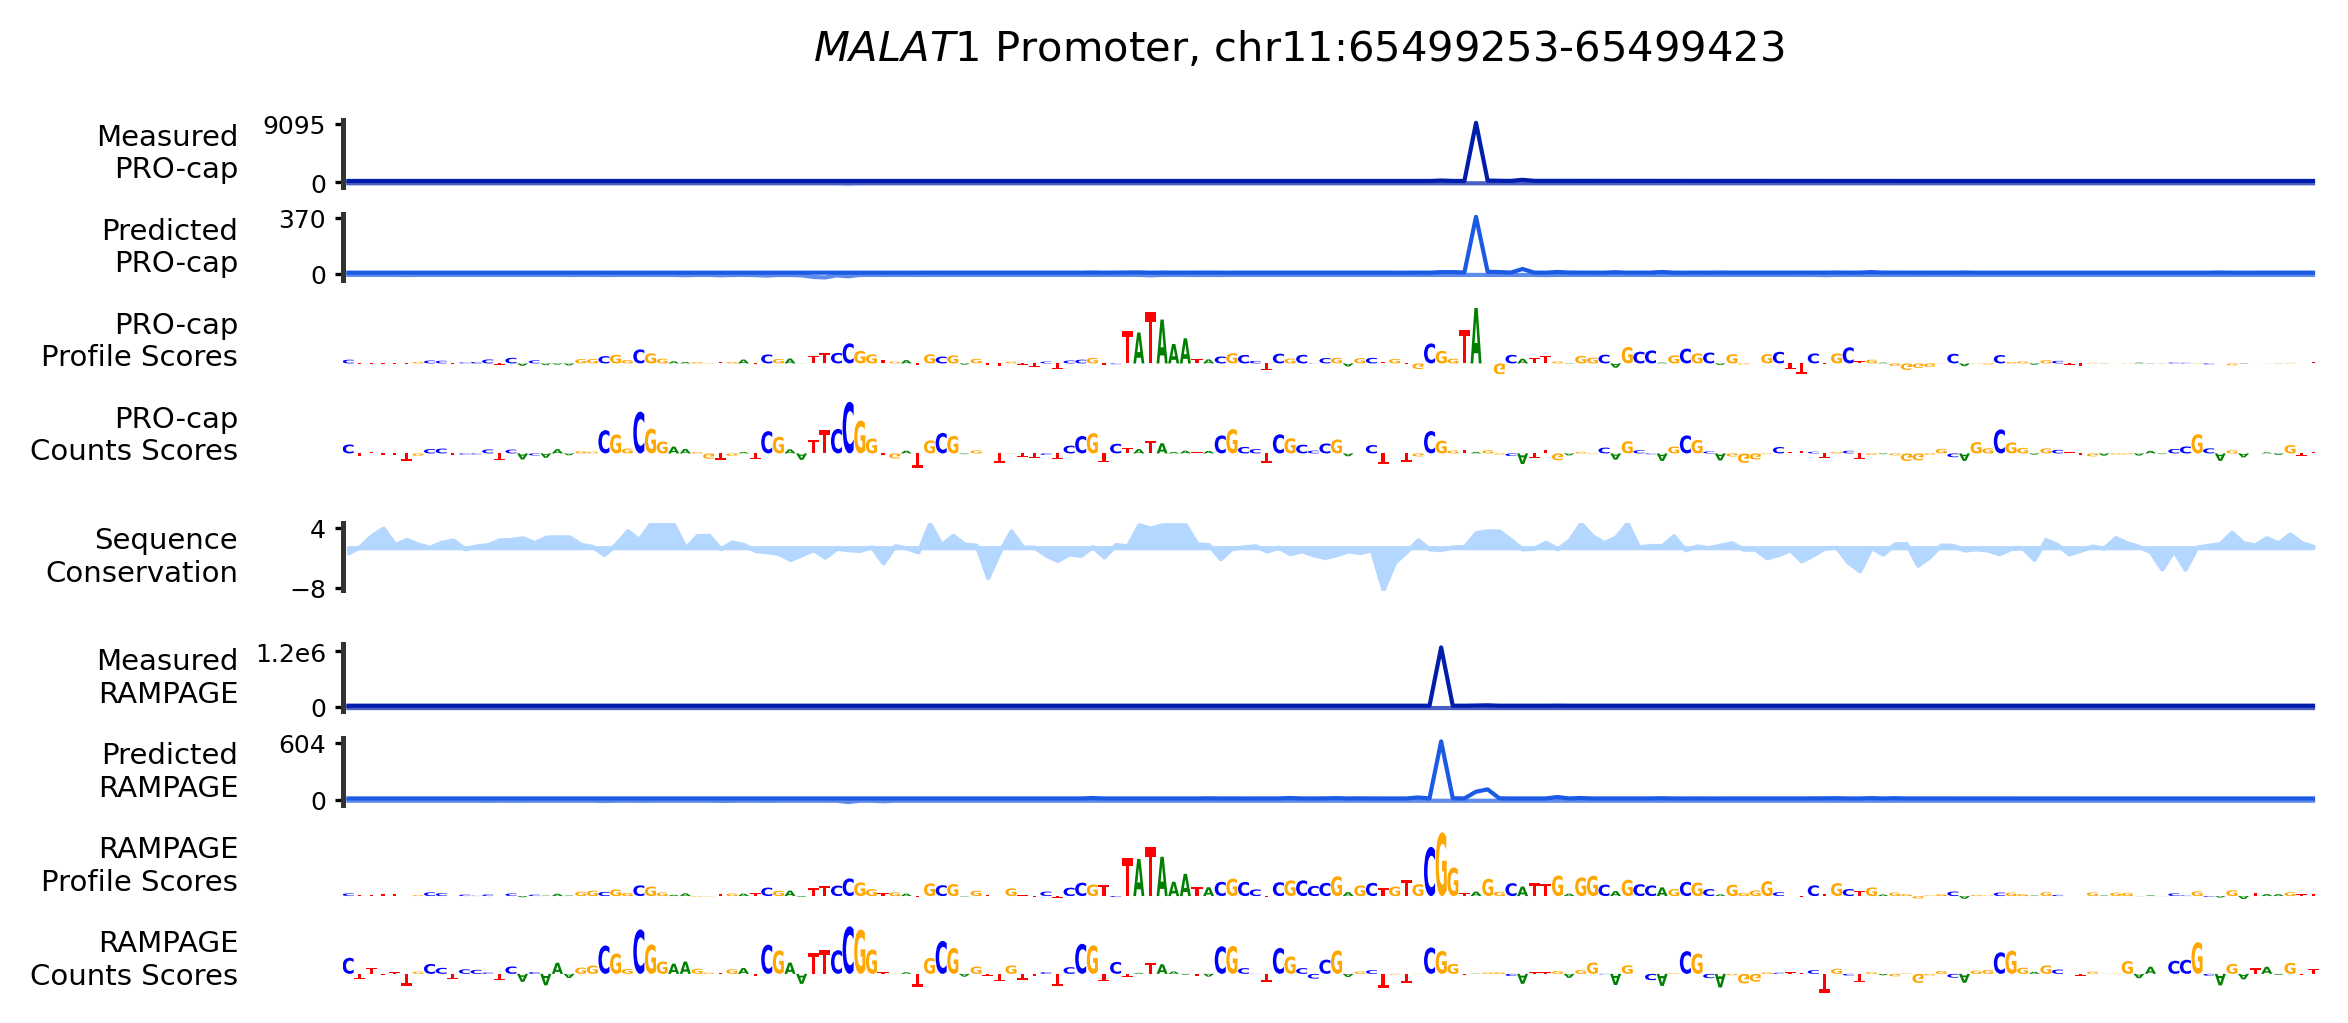

In [47]:
from other_motif_utils import plot_motif_on_ax
from matplotlib.patches import Rectangle


def slice_to_prof_len(attrs, prof_len = out_window):
    assert attrs.shape[-1] >= prof_len, attrs.shape
    mid = attrs.shape[-1] / 2
    prof_start = int(mid - prof_len / 2)
    prof_end = int(mid + prof_len / 2)
    return attrs[..., prof_start : prof_end ]


def plot_prof_on_ax(profile, ax, zoom_start, zoom_end,
                    color = "#001DAC", alphas = [1, 0.7],
                    linewidth=1, x_axis_buffer=0):
    
    x_range = np.arange(zoom_start, zoom_end) + 0.5
    offset = np.max(np.abs(profile[:, zoom_start:zoom_end])) * 0.02
    ax.plot(x_range, profile[0, zoom_start:zoom_end] + offset,
            alpha = alphas[0], c = color, linewidth=linewidth)
    ax.plot(x_range, -1 * profile[1, zoom_start:zoom_end] - offset,
            alpha = alphas[1], c = color, linewidth=linewidth)

    ax.set_xlim(zoom_start - x_axis_buffer, zoom_end + x_axis_buffer)
    
    
def get_prof_plot_lims(profs, zoom_start, zoom_end):
    neg_max_so_far = 0
    max_so_far = 0
    for prof in profs:
        prof = prof.squeeze()
        max_so_far = max(max_so_far, np.max(prof[0, zoom_start:zoom_end]))
        neg_max_so_far = max(neg_max_so_far, np.max(prof[1, zoom_start:zoom_end]))
    return -1 * neg_max_so_far, max_so_far 

def get_attr_plot_lims(attrs, zoom_start, zoom_end):
    neg_max_so_far = 0
    max_so_far = 0
    for attr in attrs:
        attr = slice_to_prof_len(attr)
        max_so_far = max(max_so_far, np.max(attr[:, zoom_start:zoom_end]))
        neg_max_so_far = min(neg_max_so_far, np.min(attr[:, zoom_start:zoom_end]))
    return neg_max_so_far, max_so_far 


def plot_obs_preds_and_attrs_cage_procap(true_profs, pred_profs,
                                         prof_attrs, count_attrs,
                                         phylop_scores,
                                         prof_len = out_window,
                                         title = None, save_path = None,
                                         zoom_midpoint = 520, zoom_width = 225,
                                         neg_strand = False):
    
    num_subplots = 9
    num_actual_subplots = 9 + 2 # ?
    height_ratios = [10] * 4 + [0.01,10,0.01] + [10] * 4
    
    fig = plt.figure(figsize=(8.5, 0.42 * num_subplots), dpi=300)
    gs = fig.add_gridspec(num_actual_subplots, height_ratios = height_ratios, hspace=0.5)
    axes = gs.subplots()

    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    
    zoom_start = min(max(zoom_midpoint - zoom_width//2, 0), prof_len - zoom_width)
    zoom_end = zoom_start + zoom_width
    
    if title is not None:
        fig.suptitle(title, y = 0.96, fontsize=10, horizontalalignment='center')
    
    prof_attr_min, prof_attr_max = get_attr_plot_lims([slice_to_prof_len(attrs) for attrs in prof_attrs.values()],
                                            zoom_start, zoom_end)
    count_attr_min, count_attr_max = get_attr_plot_lims([slice_to_prof_len(attrs) for attrs in count_attrs.values()],
                                            zoom_start, zoom_end)
    
    axis_fontsize = 7
    axis_labelpad = 4
    axis_index = 0
        
    if cage_or_rampage == "cage":
        expts_fancy_names = {"procap":"PRO-cap", "cage":"CAGE"}
    else:
        expts_fancy_names = {"procap":"PRO-cap", "rampage":"RAMPAGE"}
    
    for expt, expt_fancy_name in expts_fancy_names.items():
        plot_prof_on_ax(true_profs[expt].squeeze(), axes[axis_index], zoom_start, zoom_end,
                        color = "#001DAC")
        axes[axis_index].set_ylabel("Measured\n" + expt_fancy_name,
                                    fontsize = axis_fontsize, rotation=0, labelpad=axis_labelpad,
                                    ha='right', va="center")

        axis_index += 1

        plot_prof_on_ax(pred_profs[expt].squeeze(), axes[axis_index], zoom_start, zoom_end,
                        color = "#1B5AE3")

        axes[axis_index].set_ylabel("Predicted\n" + expt_fancy_name,
                                    fontsize = axis_fontsize, rotation=0, labelpad=axis_labelpad,
                                    ha='right', va="center")
        axis_index += 1

        prof_attr = slice_to_prof_len(prof_attrs[expt])[:, zoom_start : zoom_end].T
        plot_motif_on_ax(prof_attr, axes[axis_index])

        axes[axis_index].set_ylabel(expt_fancy_name + "\nProfile Scores",
                                    fontsize = axis_fontsize, rotation=0,
                                    labelpad=axis_labelpad, ha='right', va="center")
        axis_index += 1

        count_attr = slice_to_prof_len(count_attrs[expt])[:, zoom_start : zoom_end].T
        plot_motif_on_ax(count_attr, axes[axis_index])

        axes[axis_index].set_ylabel(expt_fancy_name + "\nCounts Scores",
                                    fontsize = axis_fontsize, rotation=0,
                                    labelpad=axis_labelpad, ha='right', va="center")
        axis_index += 2
        
        if expt == "procap":
            axes[axis_index].fill_between(np.arange(zoom_start, zoom_end) + 0.5,
                                          phylop_scores[zoom_start : zoom_end],
                                          color="#b3d7ff")
            axes[axis_index].set_xlim(zoom_start, zoom_end)
            
            #plot_prof_on_ax(pred_profs[expt].squeeze(), axes[axis_index], zoom_start, zoom_end)
            
            axes[axis_index].set_ylabel("Sequence\nConservation",
                                fontsize = axis_fontsize, rotation=0,
                                labelpad=axis_labelpad, ha='right', va="center")
        
            axis_index += 2
        

        
    # aesthetics below
    
    for ax_i, ax in enumerate(axes):
        ax.tick_params(length=2, pad=2, labelsize=6)
        
        if height_ratios[ax_i] == 0.01:  # is this one of the spacing subplots?
            ax.spines["left"].set_visible(False)
            ax.set_yticks([])
        else:
            ax.spines["left"].set_linewidth(1.2)
            ax.spines["left"].set_color("#333333")
            
            if ax_i == 0:
                plot_max = true_profs["procap"].max()
            if ax_i == 7:
                plot_max = true_profs[cage_or_rampage].max()
            if ax_i == 1:
                plot_max = pred_profs["procap"].max()
            if ax_i == 8:
                plot_max = pred_profs[cage_or_rampage].max()
            
            if ax_i in [0,1,7,8]:
                
                if plot_max > 10000:
                    print("Using scientific notation?")
                    ax.yaxis.get_offset_text().set_fontsize(6)
                    
                    plot_max_str = str(plot_max)[0] + "." + str(plot_max)[1] + "e" + str(len(str(int(plot_max))) - 1)

                    if not neg_strand:
                        ax.set_yticks([0, float(plot_max_str)], ["0", plot_max_str])
                    else:
                        ax.set_yticks([-1 * float(plot_max_str), 0], [plot_max_str, "0"])
                    
                else:
                    if not neg_strand:
                        ax.set_yticks([0, int(plot_max)])
                    else:
                        ax.set_yticks([-1 * int(plot_max), 0], [int(plot_max), 0])


            if ax_i == 5:
                ax.set_yticks([int(phylop_scores.min()),int(phylop_scores.max())])
                ax.set_ylim(phylop_scores.min(), phylop_scores.max())
                
        ax.spines[["top", "right", "bottom"]].set_visible(False)
        ax.set_xticks([])
    
    fig.align_ylabels()
    
    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)

    plt.show()


def make_title(prefix, chrom, start, end, zoom_midpoint = 500, zoom_width = 500):
    zoom_start = min(max(zoom_midpoint - zoom_width//2, 0), out_window - zoom_width)
    zoom_end = zoom_start + zoom_width
    title = prefix + chrom + ":" + str(start + zoom_start) + "-" + str(start + zoom_end)
    return title

title = make_title(r'$\it{MALAT1}$ Promoter, ', chrom, start, end, zoom_midpoint = 500, zoom_width = 170)

plot_obs_preds_and_attrs_cage_procap(ex_profs, ex_pred_profs,
                                     prof_attrs, count_attrs,
                                     phylop_scores,
                                     title = title,
                                     zoom_midpoint = 500, zoom_width = 170,
                                     save_path = figures_dir + "7_example_malat1_" + cage_or_rampage + ".png")


Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]
/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../3_eval_models/eval_utils.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  onehot_seqs = torch.tensor(onehot_seqs, dtype=torch.float32).cuda()


2023-09-13_21-57-36
2023-09-13_23-37-50
2023-09-14_01-07-10
2023-09-14_02-28-40
2023-09-14_03-25-49
2023-09-14_04-44-39
2023-09-14_05-56-16
2023-05-29_15-51-40
2023-05-29_15-58-41
2023-05-29_15-59-09
2023-05-30_01-40-06
2023-05-29_23-21-23
2023-05-29_23-23-45
2023-05-29_23-24-11


  0%|                                                                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../4_interpret_models/deepshap_utils.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(sequences[i : i + 1]).float()
/users/kcochran/miniconda3/envs/procap_A100/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████████

Using scientific notation?


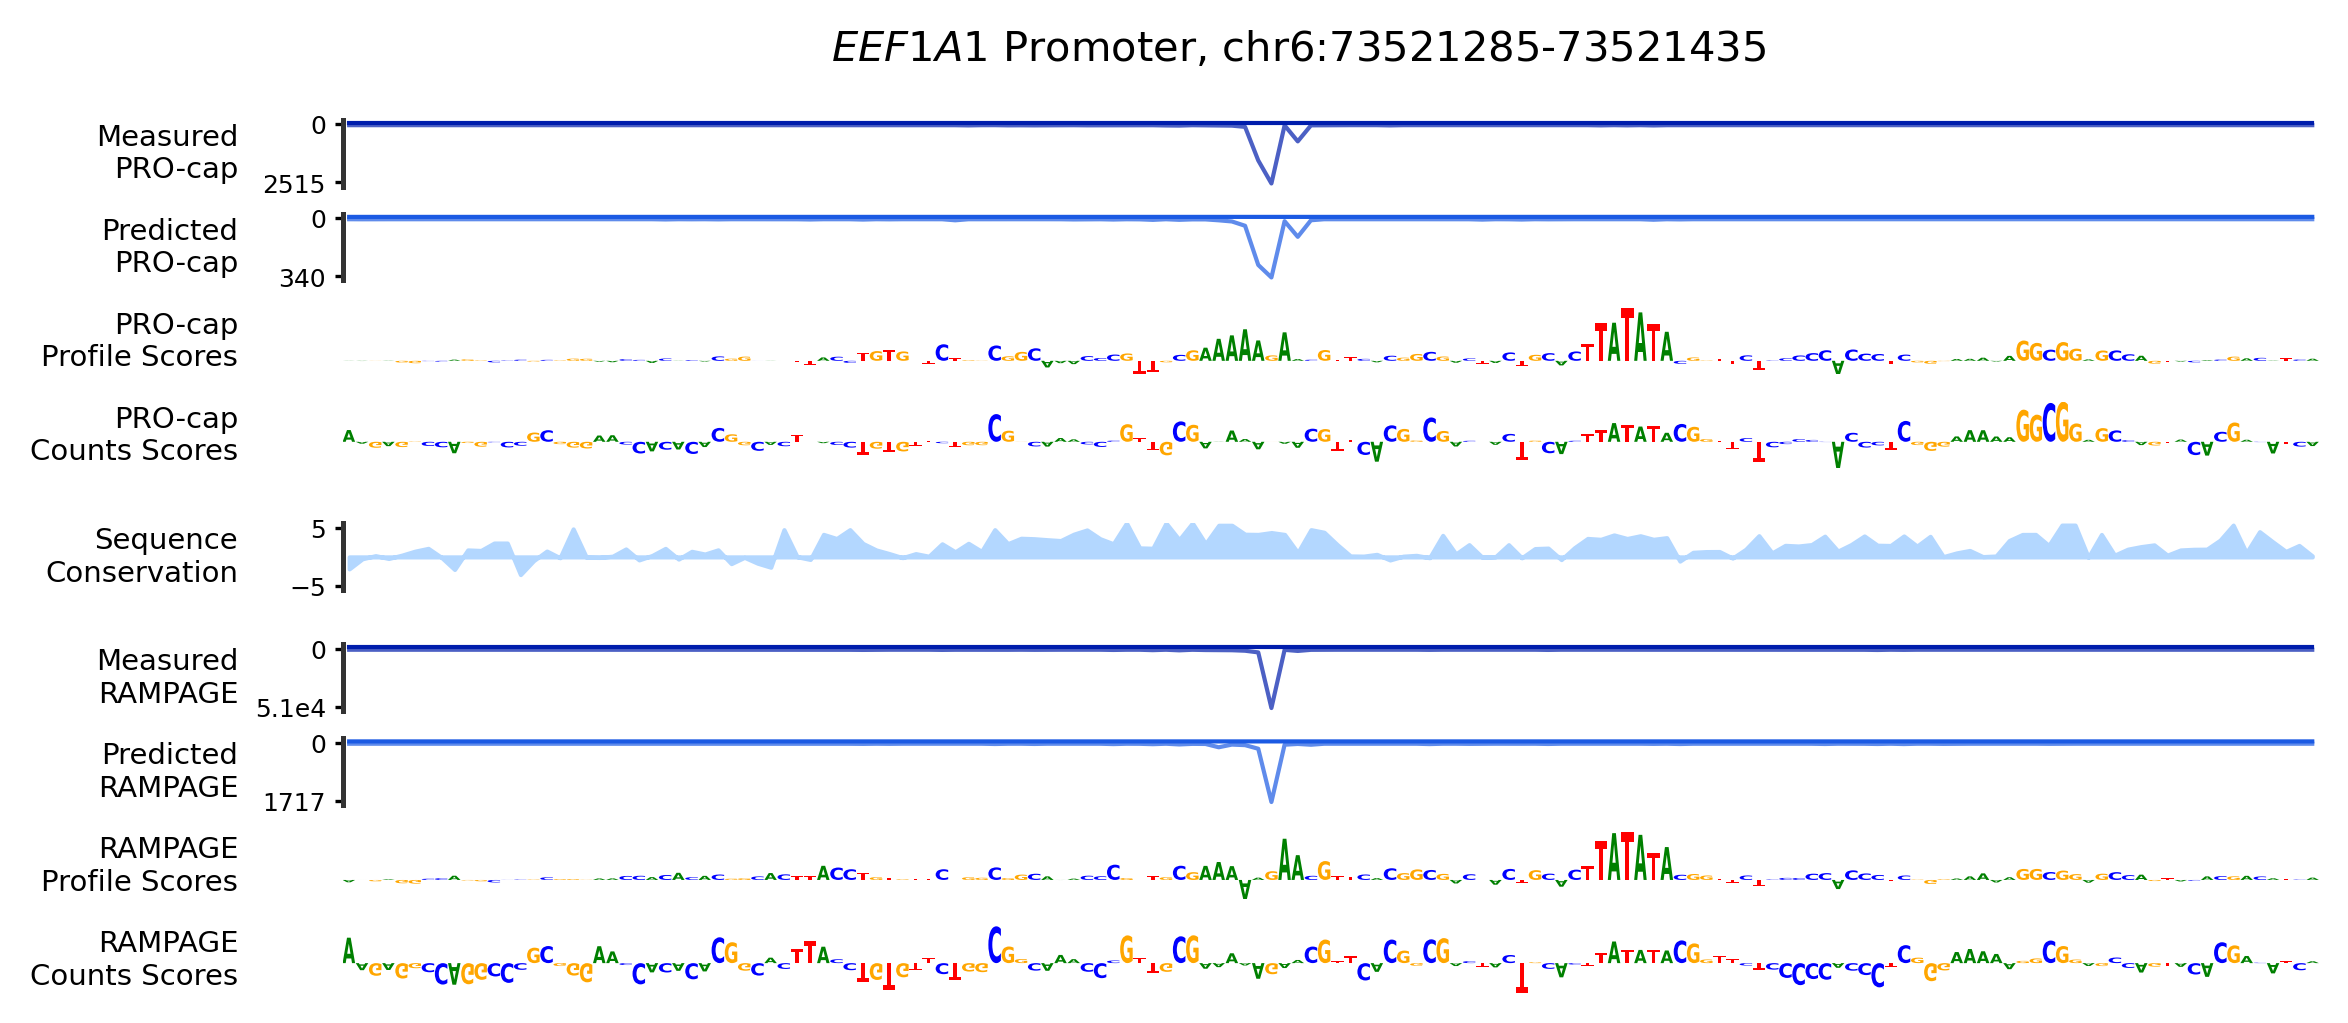

In [48]:
def make_plot_for_site2():
    chrom, start, end = ["chr6", 73520895, 73521247]

    ex_seq, ex_onehot_seq, ex_profs, phylop_scores = get_locus_data(chrom, start, end, configs)

    ex_pred_profs = dict()
    ex_pred_profs[cage_or_rampage] = predict_merge_across_folds(ex_onehot_seq, fold_configs_cage)
    ex_pred_profs["procap"] = predict_merge_across_folds(ex_onehot_seq, fold_configs_procap)
    
    prof_attrs = dict()
    count_attrs = dict()

    prof_attrs[cage_or_rampage], count_attrs[cage_or_rampage] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                                        fold_configs_cage)
    prof_attrs["procap"], count_attrs["procap"] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                          fold_configs_procap)

    title = make_title(r'$\it{EEF1A1}$ Promoter, ', chrom, start, end, zoom_midpoint = 465, zoom_width = 150)

    plot_obs_preds_and_attrs_cage_procap(ex_profs, ex_pred_profs,
                                         prof_attrs, count_attrs,
                                         phylop_scores,
                                         title = title,
                                         zoom_midpoint = 465, zoom_width = 150,
                                         save_path = figures_dir + "7_example2_ef1a_" + cage_or_rampage + ".png",
                                         neg_strand = True)
    
make_plot_for_site2()

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]
/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../3_eval_models/eval_utils.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  onehot_seqs = torch.tensor(onehot_seqs, dtype=torch.float32).cuda()


2023-09-13_21-57-36
2023-09-13_23-37-50
2023-09-14_01-07-10
2023-09-14_02-28-40
2023-09-14_03-25-49
2023-09-14_04-44-39
2023-09-14_05-56-16
2023-05-29_15-51-40
2023-05-29_15-58-41
2023-05-29_15-59-09
2023-05-30_01-40-06
2023-05-29_23-21-23
2023-05-29_23-23-45
2023-05-29_23-24-11


  0%|                                                                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../4_interpret_models/deepshap_utils.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(sequences[i : i + 1]).float()
/users/kcochran/miniconda3/envs/procap_A100/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████████

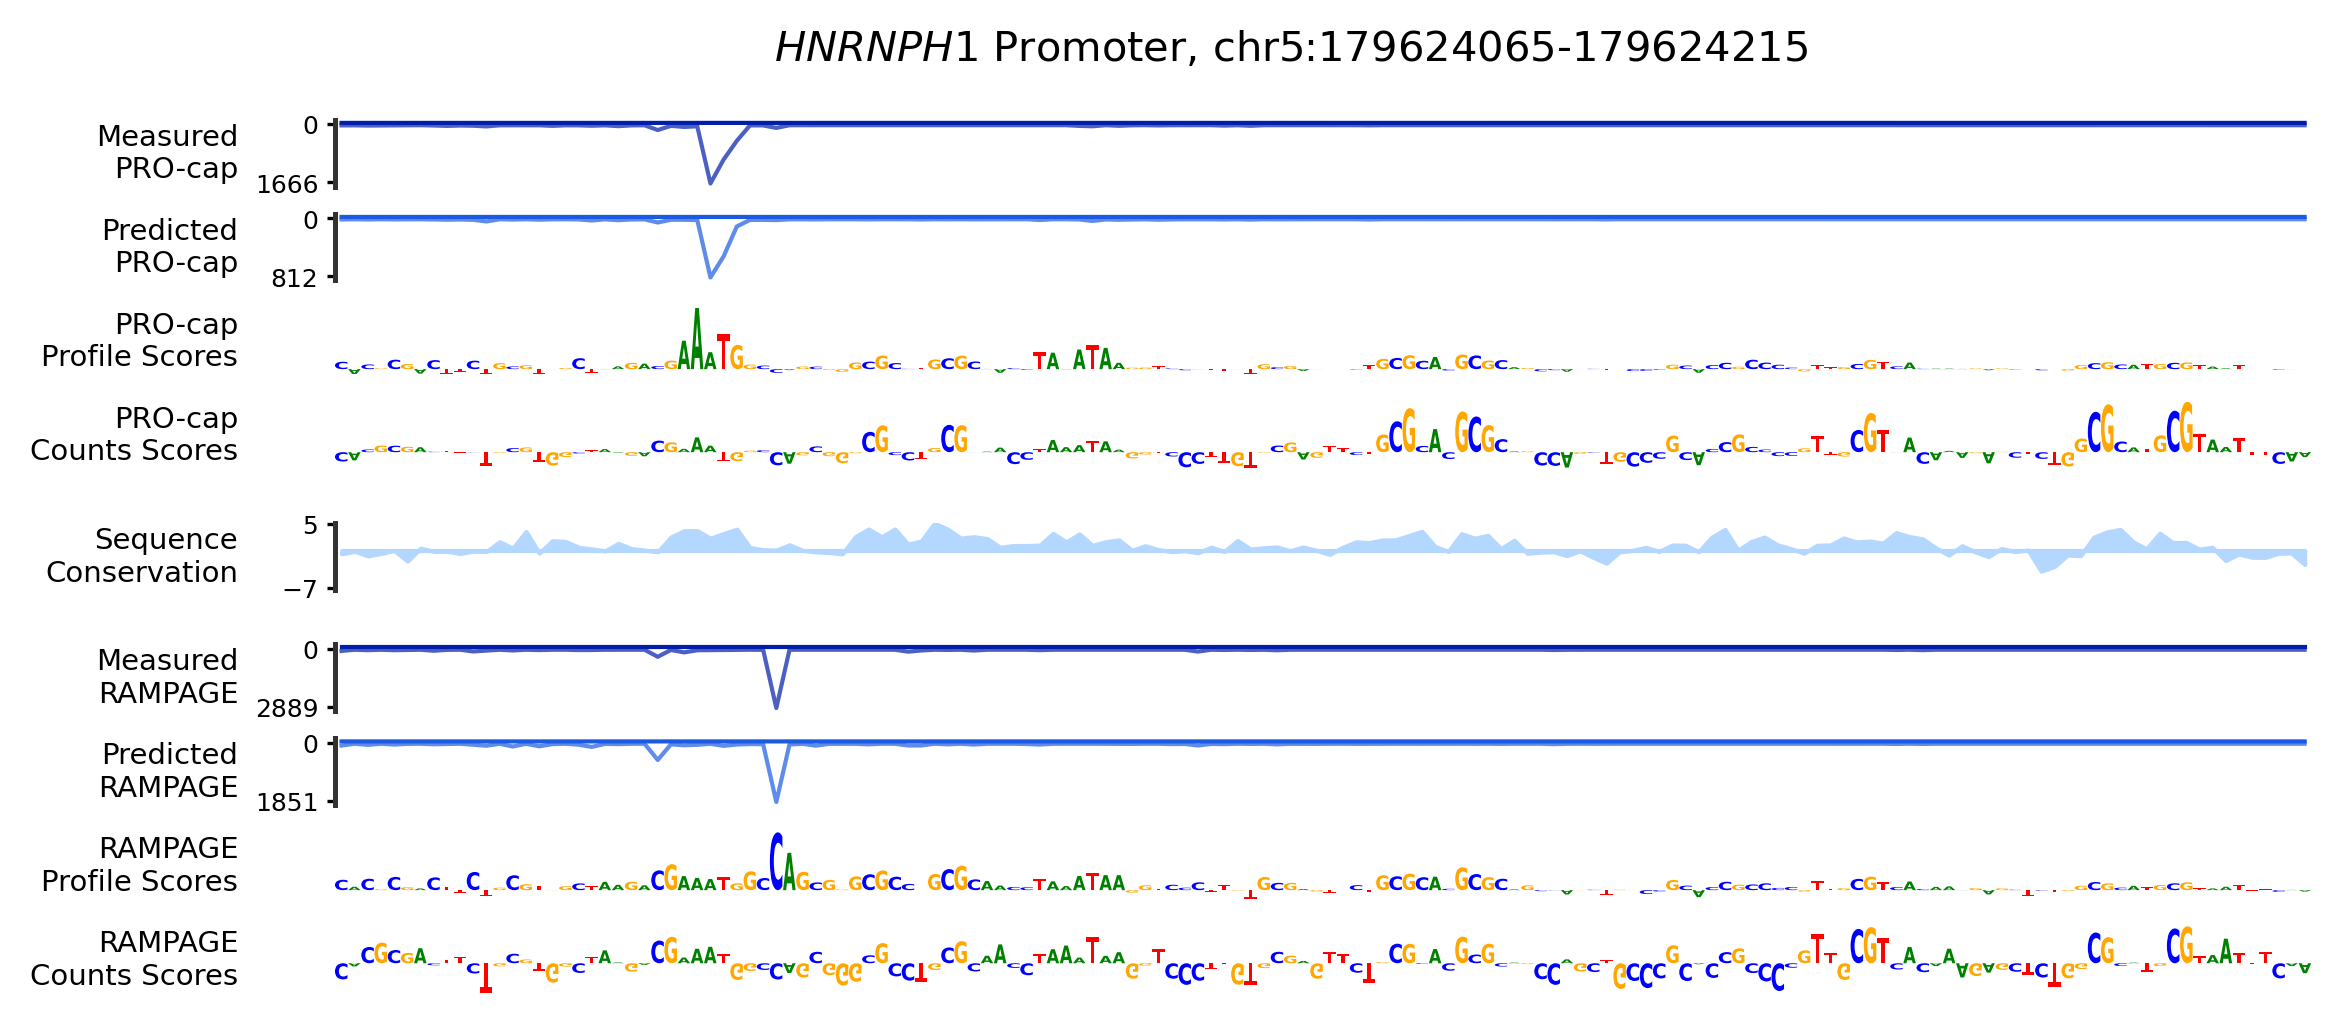

In [49]:
# HBE1 promoter: chr11:5269856-5270154
# just kidding. what about chr7:90346468-90346849
# chr5:179623647-179623788

def make_plot_for_site3():
    chrom, start, end = ["chr5", 179623640, 179623790]

    ex_seq, ex_onehot_seq, ex_profs, phylop_scores = get_locus_data(chrom, start, end, configs)

    ex_pred_profs = dict()
    ex_pred_profs[cage_or_rampage] = predict_merge_across_folds(ex_onehot_seq, fold_configs_cage)
    ex_pred_profs["procap"] = predict_merge_across_folds(ex_onehot_seq, fold_configs_procap)
    
    prof_attrs = dict()
    count_attrs = dict()

    prof_attrs[cage_or_rampage], count_attrs[cage_or_rampage] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                                        fold_configs_cage)
    prof_attrs["procap"], count_attrs["procap"] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                          fold_configs_procap)

    title = make_title(r'$\it{HNRNPH1}$ Promoter, ', chrom, start, end, zoom_midpoint = 500, zoom_width = 150)

    plot_obs_preds_and_attrs_cage_procap(ex_profs, ex_pred_profs,
                                         prof_attrs, count_attrs,
                                         phylop_scores,
                                         title = title,
                                         zoom_midpoint = 500, zoom_width = 150,
                                         save_path = figures_dir + "7_example3_hnrnph1_" + cage_or_rampage + ".png",
                                         neg_strand = True)
    
make_plot_for_site3()

In [ ]:
# need to report JSDs in text

In [50]:
def get_pseudorep_filepaths(config, pseudorep, pos_or_neg = "pos"):
    data_dir = config.data_dir
    return os.path.join(data_dir, "pseudorep" + str(pseudorep) + "." + pos_or_neg + ".bigWig")

In [ ]:
# will be using each experiments respective peak set for these calculations

In [54]:
# needs to match 1_process_data/_split_peaks_train_val_test.py

FOLDS = [["chr1", "chr4"],
         ["chr2", "chr13", "chr16"],
         ["chr5", "chr6", "chr20", "chr21"],
         ["chr7", "chr8", "chr9"],
         ["chr10", "chr11", "chr12"],
         ["chr3", "chr14", "chr15", "chr17"],
         ["chr18", "chr19", "chr22", "chrX", "chrY"]]


def get_fold_label(chrom):
    for fold_i, fold_chroms in enumerate(FOLDS):
            if chrom in fold_chroms:
                return fold_i
    return -1

def make_fold_labels(cell_type, model_type, data_type):
    merged_config = MergedFilesConfig(cell_type, model_type, data_type)
    all_coords = load_coords(merged_config.all_peak_path, in_window)
    
    fold_labels = [get_fold_label(coord[0]) for coord in all_coords]
    assert all([label > -1 for label in fold_labels]), fold_labels
    return np.array(fold_labels)
        
fold_labels = dict()
fold_labels["procap"] = make_fold_labels(cell_type, model_type, "procap")
fold_labels[cage_or_rampage] = make_fold_labels(cell_type, model_type, cage_or_rampage)

In [56]:
def get_avg_train_obs_profile_over_folds(true_profs, fold_labels):
    # For each fold, calculate the average PRO-cap profile across all examples
    # in the training or validation (not-test) sets (to use as a baseline).
    # Then, build a list the same length as fold_labels, where the ith entry
    # is the average train-val profile for the fold that example i belonged to.
    
    folds = sorted(list(set(fold_labels)))
    
    avg_profiles = []
    for fold in folds:
        # convert numeric fold labels to booleans
        in_train_val_fold = np.array([fold_label != fold for fold_label in fold_labels])
        
        # subset to profiles that were in the train-val sets for this fold
        true_profs_fold = true_profs[in_train_val_fold]
        
        # calculate mean per-base, keeping strands separate
        avg_profiles.append(np.mean(true_profs_fold, axis=0))
        
    avg_profiles_tiled = []
    for fold_label in fold_labels:
        avg_profiles_tiled.append(avg_profiles[fold_label])
    return np.array(avg_profiles_tiled)

    
avg_profiles_over_folds = get_avg_train_obs_profile_over_folds(true_profs_procap, fold_labels["procap"])
avg_profiles_over_folds_cage = get_avg_train_obs_profile_over_folds(true_profs_cage, fold_labels["procap"])

avg_profiles_over_folds_cage_cagepeaks = get_avg_train_obs_profile_over_folds(true_profs_cage_cagepeaks, fold_labels[cage_or_rampage])

In [65]:
from scipy.spatial.distance import jensenshannon

def calc_profile_jsds(profs1, profs2):
    assert profs1.shape == profs2.shape, (profs1.shape, profs2.shape)
    
    # assuming none of these profiles are in log-space

    jsds = []
    for prof1, prof2 in zip(profs1, profs2):
        # if multiple strands, flatten data across them into 1D array
        prof1 = prof1.flatten()
        prof2 = prof2.flatten()
        
        jsd = jensenshannon(prof1, prof2, base=2)
        jsds.append(jsd)
        
    return np.array(jsds)
    
# compare model predictions vs. observed data on the test sets
jsds_pred_vs_obs = calc_profile_jsds(true_profs_procap, np.exp(log_pred_profs_test["procap"]))
jsds_pred_vs_obs_cage = calc_profile_jsds(true_profs_cage_cagepeaks, np.exp(log_pred_profs_test[cage_or_rampage]))

# baseline 1: observed data pseudoreplicate 1 vs. observed data pseudoreplicate 2 on test sets
jsds_pseudoreps = calc_profile_jsds(pr1_profs["procap"], pr2_profs["procap"])
jsds_pseudoreps_cage = calc_profile_jsds(pr1_profs[cage_or_rampage], pr2_profs[cage_or_rampage])

# baseline 2: average data profile in the training + validation set vs. observed data on test sets
jsds_avg_baseline = calc_profile_jsds(true_profs_procap, avg_profiles_over_folds)
jsds_avg_baseline_cage = calc_profile_jsds(true_profs_cage_cagepeaks, avg_profiles_over_folds_cage_cagepeaks)

In [66]:
def normalize_profile_metric(metrics_pred_vs_obs, metrics_upper_bound, metrics_lower_bound,
                             bigger_is_worse = False):
    assert metrics_pred_vs_obs.shape == metrics_upper_bound.shape
    assert metrics_upper_bound.shape == metrics_lower_bound.shape
    
    # For each locus/peak/example, min-max normalize the performance metric
    # using the replicate performance as the upper bound and the "average profile"
    # baseline as the lower bound.
    
    norm_metrics = (metrics_pred_vs_obs - metrics_lower_bound) / (metrics_upper_bound - metrics_lower_bound)
    
    # If bigger values for the original metric mean worse performance,
    # we want the normalized metric to follow the same pattern,
    # so we need to flip the direction of the norm metric 
    if bigger_is_worse:
        norm_metrics = 1 - norm_metrics
    
    norm_metrics = np.clip(norm_metrics, 0, 1)
    return norm_metrics


norm_jsds = normalize_profile_metric(jsds_pred_vs_obs, jsds_pseudoreps, jsds_avg_baseline,
                                     bigger_is_worse = True)

norm_jsds_cage = normalize_profile_metric(jsds_pred_vs_obs_cage, jsds_pseudoreps_cage, jsds_avg_baseline_cage,
                                     bigger_is_worse = True)

In [67]:
norm_val_metrics = {"procap" : norm_jsds, cage_or_rampage : norm_jsds_cage}

In [70]:
def stratify_profile_metrics_over_folds(prof_metrics, fold_labels):
    folds = sorted(list(set(fold_labels)))
    
    aggregated_metric_per_fold = []
    for fold in folds:
        # convert numeric fold labels to booleans
        in_fold = np.array([fold_num == fold for fold_num in fold_labels])
        
        prof_metrics_fold = prof_metrics[in_fold]
        
        aggregated_metric_per_fold.append(np.mean(prof_metrics_fold))
        
    print("Metric Average Within Each Fold's Test Set:")
    print(aggregated_metric_per_fold)
    
    print("\nMetric Average, Averaged Across Folds:")
    print(np.mean(aggregated_metric_per_fold))
    
    print("\nStandard Deviation of Metric Average Across Folds:")
    print(np.std(aggregated_metric_per_fold), "\n")

print("--- JSD ---")
stratify_profile_metrics_over_folds(jsds_pred_vs_obs, fold_labels["procap"])

print("--- Normalized JSD ---")
stratify_profile_metrics_over_folds(norm_jsds, fold_labels["procap"])

--- JSD ---
Metric Average Within Each Fold's Test Set:
[0.6909394299011592, 0.6870753330705576, 0.6995797923847845, 0.6951706020671616, 0.6952935975883707, 0.6892008455841674, 0.6910371055125749]

Metric Average, Averaged Across Folds:
0.6926138151583966

Standard Deviation of Metric Average Across Folds:
0.003961528498954387 

--- Normalized JSD ---
Metric Average Within Each Fold's Test Set:
[0.4523799293150911, 0.4341977491980769, 0.46577047101173724, 0.45729917591105207, 0.4417250925473142, 0.4315404711394051, 0.4328048122542769]

Metric Average, Averaged Across Folds:
0.4451025287681363

Standard Deviation of Metric Average Across Folds:
0.012503525950204262 



In [72]:
print("--- JSD ---")
stratify_profile_metrics_over_folds(jsds_pred_vs_obs_cage, fold_labels[cage_or_rampage])

print("--- Normalized JSD ---")
stratify_profile_metrics_over_folds(norm_jsds_cage, fold_labels[cage_or_rampage])

--- JSD ---
Metric Average Within Each Fold's Test Set:
[0.7144177215433376, 0.7183030542159164, 0.7147788020903407, 0.721086949939103, 0.7164546513433253, 0.7220466773464613, 0.7139241625056472]

Metric Average, Averaged Across Folds:
0.7172874312834472

Standard Deviation of Metric Average Across Folds:
0.0030390743131357254 

--- Normalized JSD ---
Metric Average Within Each Fold's Test Set:
[0.6958098537785254, 0.6981289501737292, 0.695298725942238, 0.7072928566004725, 0.6992270358105827, 0.7087276954920094, 0.6859680655804985]

Metric Average, Averaged Across Folds:
0.6986361690540078

Standard Deviation of Metric Average Across Folds:
0.0071413381080939285 



## Contribution Score Similarity Across ProCapNet, RAMPAGE-Net

In [75]:
sys.path.append('../4_interpret_models')
import torch
from deepshap_utils import ProfileModelWrapper, CountsModelWrapper, get_attributions

# different from the earlier function, this one does multiple sequences
def deepshap_batch_merge_across_folds(onehot_seqs, configs):
    prof_deepshap_across_folds = []
    count_deepshap_across_folds = []
    
    onehot_seqs_t = torch.tensor(onehot_seqs).float()
    
    for config in configs:
        model = load_model(config)
        prof_attrs, count_attrs = get_attributions(onehot_seqs_t, model, is_stranded=False)
        prof_deepshap_across_folds.append(prof_attrs * onehot_seqs)
        count_deepshap_across_folds.append(count_attrs * onehot_seqs)

    merged_prof_deepshap = np.array(prof_deepshap_across_folds).mean(axis=0)
    merged_count_deepshap = np.array(count_deepshap_across_folds).mean(axis=0)
    return merged_prof_deepshap, merged_count_deepshap

In [76]:
def load_all_procap_deepshap_scores(config):
    profile_deepshap_path = config.profile_onehot_scores_path
    counts_deepshap_path = config.counts_onehot_scores_path
    
    # because already onehot, flattening 4-axis
    profile_deepshap = np.load(profile_deepshap_path).sum(axis=1)
    counts_deepshap = np.load(counts_deepshap_path).sum(axis=1)
    
    return profile_deepshap, counts_deepshap

all_deepshap_prof_procap, all_deepshap_count_procap = load_all_procap_deepshap_scores(configs["procap"])

In [77]:
def load_all_cage_deepshap_scores(config):
    profile_deepshap_path = config.profile_onehot_scores_path.replace("all_", "all_procap_peaks_")
    counts_deepshap_path = config.counts_onehot_scores_path.replace("all_", "all_procap_peaks_")
    
    # because already onehot, flattening 4-axis
    profile_deepshap = np.load(profile_deepshap_path).sum(axis=1)
    counts_deepshap = np.load(counts_deepshap_path).sum(axis=1)
    
    return profile_deepshap, counts_deepshap

all_deepshap_prof_cage, all_deepshap_count_cage = load_all_cage_deepshap_scores(configs[cage_or_rampage])

In [78]:
# probably makes sense to focus on the deepshap scores within the peak region

all_deepshap_prof_procap = all_deepshap_prof_procap[..., in_window//2 - out_window//2 : in_window//2 + out_window//2]
all_deepshap_count_procap = all_deepshap_count_procap[..., in_window//2 - out_window//2 : in_window//2 + out_window//2]
all_deepshap_prof_cage = all_deepshap_prof_cage[..., in_window//2 - out_window//2 : in_window//2 + out_window//2]
all_deepshap_count_cage = all_deepshap_count_cage[..., in_window//2 - out_window//2 : in_window//2 + out_window//2]


In [79]:
all_deepshap_prof_procap.shape, all_deepshap_prof_cage.shape

((30534, 1000), (30534, 1000))

In [81]:
from scipy.stats import spearmanr

def calc_deepshap_correlations(deepshaps1, deepshaps2):
    assert len(deepshaps1.shape) == 2, deepshaps1.shape 
    assert len(deepshaps2.shape) == 2, deepshaps2.shape
    assert deepshaps1.shape[0] == deepshaps2.shape[0], (deepshaps1.shape, deepshaps2.shape)
    assert deepshaps1[0].shape == deepshaps2[0].shape, (deepshaps1.shape, deepshaps2.shape)
    
    pearson_rs = [np.corrcoef(deepshaps1[i], deepshaps2[i])[0,1] for i in range(deepshaps1.shape[0])]
    spearman_rs = [spearmanr(deepshaps1[i], deepshaps2[i]).correlation for i in range(deepshaps1.shape[0])]
    
    return pearson_rs, spearman_rs

prof_deepshap_pearson_rs, prof_deepshap_spearman_rs = calc_deepshap_correlations(all_deepshap_prof_procap,
                                                                                 all_deepshap_prof_cage)
count_deepshap_pearson_rs, count_deepshap_spearman_rs = calc_deepshap_correlations(all_deepshap_count_procap,
                                                                                 all_deepshap_count_cage)

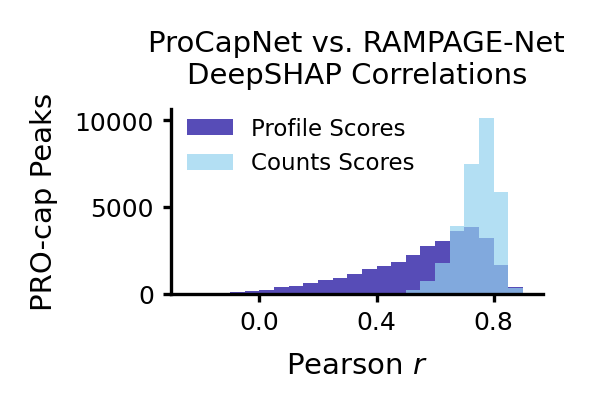

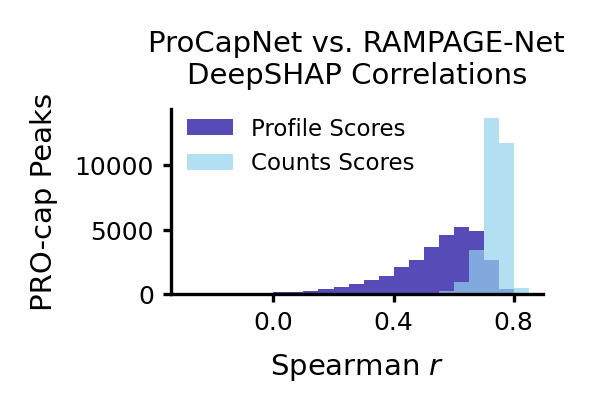

In [93]:
import matplotlib.pyplot as plt

def plot_correlations(prof_rs, count_rs, label = "Pearson $r$", save_path = None):
    plt.figure(figsize=(1.6,0.8), dpi=300)

    xmin = min(np.min(prof_rs), np.min(count_rs))
    xmax = max(np.max(prof_rs), np.max(count_rs))
    
    bins = np.arange(-1, 1, 0.05)
    
    plt.hist(prof_rs, bins=bins, label="Profile Scores", alpha=0.7, color="#100099")
    plt.hist(count_rs, bins=bins, label="Counts Scores", alpha=0.7, color="#93d2ee")

    plt.legend(frameon=False, fontsize=5.5, loc="center", bbox_to_anchor=(-0.15,0.3,1,1))
    
    title = "ProCapNet vs. " + cage_or_rampage.upper() + "-Net\nDeepSHAP Correlations"
    plt.title(title, fontsize=7)
    plt.xlabel(label, fontsize=7)
    plt.ylabel("PRO-cap Peaks", fontsize=7)
    
    plt.gca().spines[["top", "right"]].set_visible(False)
    plt.xticks([0, 0.4, 0.8])
    plt.gca().tick_params(length=2, pad=2, labelsize=6)
    if xmin < 0:
        plt.xlim(1.05 * xmin, 1.05 * xmax)
    else:
        plt.xlim(0.95 * xmin, 1.05 * xmax)
        
    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0.001, dpi = 300)
        
    plt.show()

plot_correlations(prof_deepshap_pearson_rs, count_deepshap_pearson_rs,
                  label="Pearson $r$", save_path = figures_dir + "7_deepshap_pearson_rs.png")
    
plot_correlations(prof_deepshap_spearman_rs, count_deepshap_spearman_rs,
                  label="Spearman $r$")

In [94]:
np.mean(prof_deepshap_pearson_rs), np.mean(count_deepshap_pearson_rs)

(0.5635802823554279, 0.7452162947243464)

In [95]:
np.mean(prof_deepshap_spearman_rs), np.mean(count_deepshap_spearman_rs)

(0.5444390580217722, 0.7354694082475758)

In [97]:
# these files are made by 1.1_make_pseudoreps.sh
# which does:
# bedtools bamtobed -i "$bam" | awk 'BEGIN{OFS="\t"}{$4="N";$5="1000";print $0}' | grep -v "dm6" | gzip -nc > "$tagalign"
# (there was a drosophila spike-in for one expt)

procap_tagalign = configs["procap"].data_dir + "merged.tagAlign.bed.gz"
cage_tagalign = configs[cage_or_rampage].data_dir + "merged.tagAlign.bed.gz"

assert os.path.exists(procap_tagalign)
assert os.path.exists(cage_tagalign)

procap_readbed_pos = "procap.pos.reads.bed.gz"
procap_readbed_neg = "procap.neg.reads.bed.gz"
cage_readbed_pos = cage_or_rampage + ".pos.reads.bed.gz"
cage_readbed_neg = cage_or_rampage + ".neg.reads.bed.gz"

In [100]:
! zcat $procap_tagalign | grep -e "chr[0-9XY]*	" | LC_COLLATE=C sort -k1,1 -k2,2n | bedtools genomecov -5 -bg -strand "+" -g $chrom_sizes  -i stdin | gzip -nc > $procap_readbed_pos
! zcat $procap_tagalign | grep -e "chr[0-9XY]*	" | LC_COLLATE=C sort -k1,1 -k2,2n | bedtools genomecov -5 -bg -strand "-" -g $chrom_sizes  -i stdin | gzip -nc > $procap_readbed_neg
! zcat $cage_tagalign | grep -e "chr[0-9XY]*	" | LC_COLLATE=C sort -k1,1 -k2,2n | bedtools genomecov -5 -bg -strand "+" -g $chrom_sizes  -i stdin | gzip -nc > $cage_readbed_pos
! zcat $cage_tagalign | grep -e "chr[0-9XY]*	" | LC_COLLATE=C sort -k1,1 -k2,2n | bedtools genomecov -5 -bg -strand "-" -g $chrom_sizes  -i stdin | gzip -nc > $cage_readbed_neg


In [101]:
from data_loading import extract_sequences

def load_seqs_at_TSSs(pos_readbed, neg_readbed, seq_extend = 5):
    # this is implemented assuming that you've got bed windows of a single base
    
    # this function can't load odd seq lengths in, so just load an extra base and then truncate
    # technically, load 2 extra so 
    seqs_at_TSSs_pos = extract_sequences(genome_path, chrom_sizes, pos_readbed,
                                           in_window=seq_extend * 2 + 2, verbose=True)[:, :, 1:]
    seqs_at_TSSs_neg = extract_sequences(genome_path, chrom_sizes, neg_readbed,
                                           in_window=seq_extend * 2 + 2, verbose=True)[:, :, 1:]
    
    # RC the neg seqs so any stranded motifs are in the same orientation
    seqs_at_TSSs_neg = seqs_at_TSSs_neg[:, ::-1, ::-1]
    
    seqs_at_TSSs = np.concatenate((seqs_at_TSSs_pos, seqs_at_TSSs_neg), axis=0)
    return seqs_at_TSSs

seqs_at_procap = load_seqs_at_TSSs(procap_readbed_pos, procap_readbed_neg)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.05it/s]
Loading Peaks: 3051531it [04:07, 12350.32it/s]


== In Extract Sequences ==
Peak filepath: procap.pos.reads.bed.gz
Sequence length: 12
Num. Examples: 3051531
Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.94it/s]
Loading Peaks: 3007372it [04:03, 12375.74it/s]


== In Extract Sequences ==
Peak filepath: procap.neg.reads.bed.gz
Sequence length: 12
Num. Examples: 3007372


In [102]:
seqs_at_cage = load_seqs_at_TSSs(cage_readbed_pos, cage_readbed_neg)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.44it/s]
Loading Peaks: 568066it [00:45, 12593.70it/s]


== In Extract Sequences ==
Peak filepath: rampage.pos.reads.bed.gz
Sequence length: 12
Num. Examples: 568066
Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.80it/s]
Loading Peaks: 556114it [00:43, 12666.08it/s]


== In Extract Sequences ==
Peak filepath: rampage.neg.reads.bed.gz
Sequence length: 12
Num. Examples: 556114


In [103]:
import gzip

# have to cast to float bc some numbers are in scientific notation

def read_last_bed_col(bed_path):
    if bed_path.endswith(".gz"):
        with gzip.open(bed_path) as f:
            last_col = [int(float(line.decode().rstrip().split()[-1])) for line in f]
    else:
        with open(bed_path) as f:
            last_col = [int(line.rstrip().split()[-1]) for line in f]
    return np.array(last_col)

counts_at_procap = np.concatenate([read_last_bed_col(f) for f in [procap_readbed_pos, procap_readbed_neg]])
counts_at_cage = np.concatenate([read_last_bed_col(f) for f in [cage_readbed_pos, cage_readbed_neg]])

In [104]:
def calc_ppm(seqs, counts):
    assert len(seqs.shape) == 3 and len(counts.shape) == 1, (seqs.shape, counts.shape)
    
    pfm_unnorm = np.sum(seqs * counts[..., None, None], axis=0)
    
    ppm = (pfm_unnorm / pfm_unnorm.sum(axis=0, keepdims=True)).T
    return ppm
    
ppm_at_procap = calc_ppm(seqs_at_procap, counts_at_procap)
ppm_at_cage = calc_ppm(seqs_at_cage, counts_at_cage)

In [105]:
from other_motif_utils import compute_per_position_ic

pwm_procap = ppm_at_procap * compute_per_position_ic(ppm_at_procap)[:, None]
pwm_cage = ppm_at_cage * compute_per_position_ic(ppm_at_cage)[:, None]

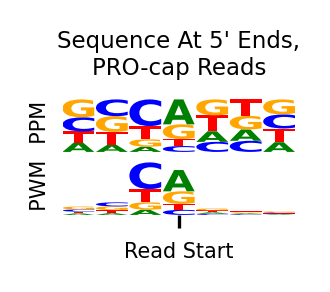

In [118]:
from other_motif_utils import plot_motif_on_ax

def plot_consensus_at_5prime_ends(ppm, pwm, title, save_path = None):
    fig, axes = plt.subplots(2, 1, figsize=(1,0.5), dpi=300)

    plot_motif_on_ax(ppm, axes[0])
    plot_motif_on_ax(pwm, axes[1])

    axes[0].set_ylabel("  PPM ", fontsize=5, labelpad=-0.5)
    axes[1].set_ylabel("  PWM ", fontsize=5, labelpad=0)
    plt.title(title, fontsize=5.5, y=2.2)
    plt.xticks([3], ["Read Start"], fontsize=5)
    plt.gca().tick_params(length=3)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0.01, dpi = 300)

    plt.show()
    

plot_consensus_at_5prime_ends(ppm_at_procap[2:-2], pwm_procap[2:-2],
                              "Sequence At 5' Ends,\nPRO-cap Reads",
                              save_path = figures_dir + "7_5prime_ends_procap.png")

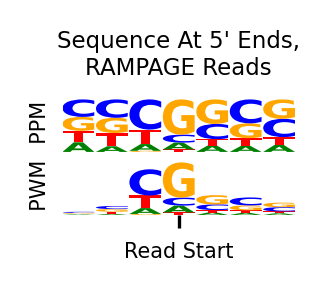

In [119]:
plot_consensus_at_5prime_ends(ppm_at_cage[2:-2], pwm_cage[2:-2],
                              "Sequence At 5' Ends,\n" + cage_or_rampage.upper() + " Reads",
                              save_path = figures_dir + "7_5prime_ends_" + cage_or_rampage + ".png")